# Example analysis: Data exported from Zipgrade

https://www.zipgrade.com/

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from genmccd import GenMCCopyDetector
%matplotlib inline

In [2]:
df = pd.read_csv("zipgrade_export_example.csv")

## Initialize model

In [3]:
%%time
copy_model = GenMCCopyDetector(df)

CPU times: user 3.83 s, sys: 45.7 ms, total: 3.88 s
Wall time: 3.86 s


## Visualize pairs for which ratio is > 1

<AxesSubplot:>

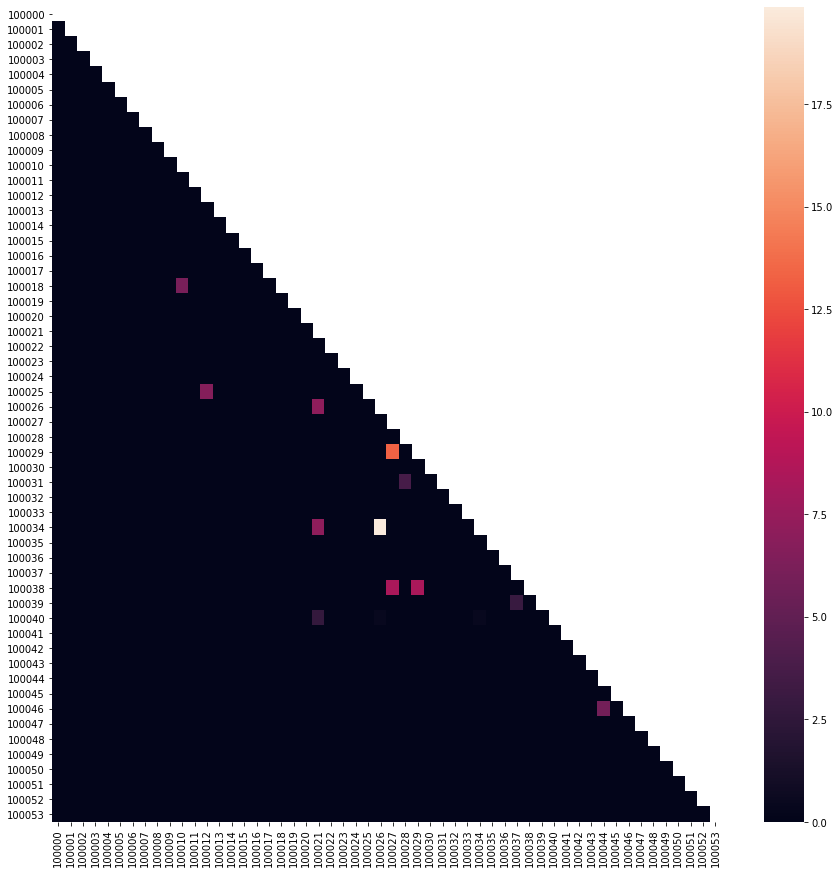

In [4]:
score_df = copy_model.get_copying_logprobs(student_sort_order="id")
plt.figure(figsize=(15,15))
sns.heatmap(score_df, vmin=0)

## Find top pairs

In [5]:
copy_model.print_top_scores(n=10)

19.87418 Adrianna Alsbrooks   Isela Ioli          
13.34704 Britany Buskirk      Delmar Dupree       
8.35350 Britany Buskirk      Marcelina Modrak    
8.35350 Delmar Dupree        Marcelina Modrak    
7.13334 Vada Velverton       Adrianna Alsbrooks  
7.13334 Vada Velverton       Isela Ioli          
6.62258 Magdalene Mossor     Zachery Zeitler     
6.12024 Kayleigh Kalland     Sanford Stogner     
5.85412 Suzy Spaniel         Ute Unga            
3.68424 Coral Catchings      Fredricka Fioravanti


## Visualize graph

In [6]:
G = copy_model.get_graph(threshold=5)

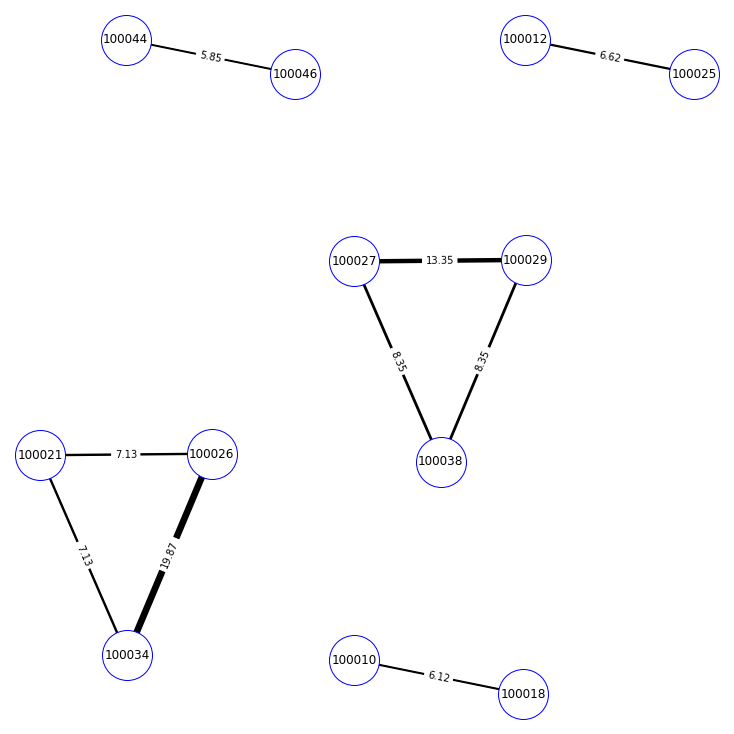

In [7]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout as layout

options = {"with_labels": True, "node_color": "white", 
           "edgecolors": "blue", "node_size": 2500}
pos = layout(G, prog="neato")

plt.figure(figsize=(10,10))
nx.draw(G, pos=pos, **options)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edges(G, pos, width=[x/3 for x in labels.values()])
nx.draw_networkx_edge_labels(G, pos, edge_labels={x:f"{y:2.2f}" for x, y in labels.items()})
plt.show()